<a href="https://colab.research.google.com/github/kurtlee1984/Machine_Learning/blob/main/classification_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data

In [19]:
import pandas as pd
df = pd.DataFrame(iris_data["data"], columns=iris_data["feature_names"])
df["Ans"] = iris_data["target"]
df.to_csv("iris.csv", encoding="utf-8", index=False)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Ans
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


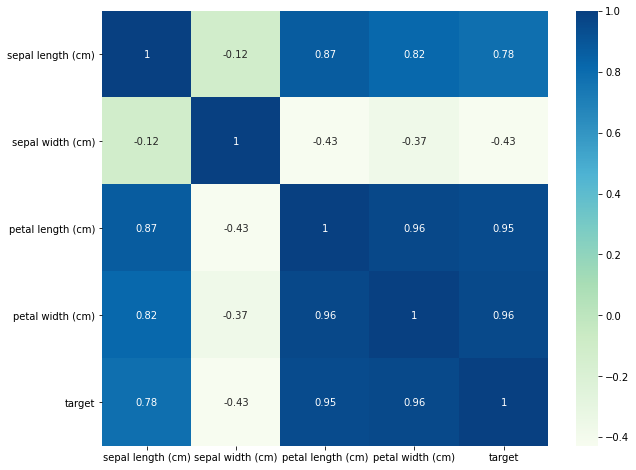

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10, 8))
sns.heatmap(df.astype("float").corr(), cmap="GnBu", annot=True)

In [18]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


In [20]:
from sklearn.model_selection import train_test_split
import numpy as np
# train_test_split(df.drop["target"], axis=1 ,df["target"], test_size=0.1)
x = df.drop(["Ans"], axis=1)
y = df["Ans"]
x, y = np.array(x), np.array(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [28]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

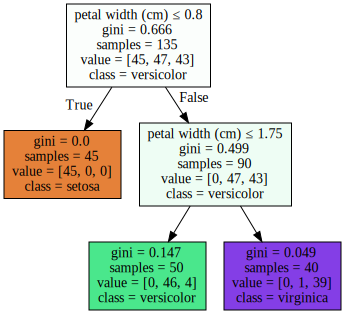

In [29]:
from sklearn.tree import export_graphviz
import graphviz
g = export_graphviz(clf, out_file=None, 
                    feature_names=iris_data["feature_names"], 
                    class_names=iris_data["target_names"], 
                    filled=True, 
                    special_characters=True)
graph = graphviz.Source(g)
graph

In [30]:
pre = clf.predict(x_test)
print("預測結果 :", list(pre))
print("真正標籤 :", list(y_test))

預測結果 : [1, 0, 0, 2, 0, 1, 1, 2, 2, 2, 0, 1, 2, 2, 0]
真正標籤 : [1, 0, 0, 2, 0, 1, 2, 2, 2, 2, 0, 1, 2, 2, 0]


In [31]:
from sklearn.metrics import accuracy_score
print("預測成功機率:", accuracy_score(pre, y_test))

預測成功機率: 0.9333333333333333


In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pre)
pd.DataFrame(confusion_matrix(y_test, pre))

,0,1,2
0,5,0,0
1,0,3,0
2,0,1,6
